Yoanne BOUNGOTO BIBAYI

<h1>Sujet:</h1> 
<p>Prédiction de la probabilité d’attrition (churn ou désabonnement) des services
de téléphonie et d'Internet à domicile d’une entreprise de télécommunications
L’objectif de ce TP est d’aider une entreprise de télécommunications à identifier ses clients
qui ont une forte probabilité de se désabonner des services de téléphonie et d’internet à
    domicile.</p>

<strong>Churn:</strong> Yes = le client s’est désabonné de l’entreprise, Non : le client est resté
abonné dans l’entreprise __*(variable à expliquer)*__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1. Data management

#### 1. Faites une brève description de la base de données (nombre de lignes, de colonnes, % de churn)

In [2]:
dataset=pd.read_csv('train.csv')

In [3]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes


#### Taille de notre dataset (Lignes, Colonnes)

In [4]:
dataset.shape

(6338, 21)

#### Types de données de nos columns

In [5]:
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Statistique descriptive de l'ensemble de nos données (seulement les variables numeriques)

In [6]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,6338.000000,6338.000000,6338.000000
mean,0.160461,32.435942,64.773391
std,0.367062,24.504535,30.099748
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.550000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,118.750000


75% des clients sont restés abonnés pendants 55 mois.
25% des clients payent plus de 89.9 (€ or $) ?
25% 50% 75% --> 0 indique si le client est un senior (plus de 65 ans) ou non (1, 0) à voir pour explication

#### Visualisons la repartition de notre variable cible  

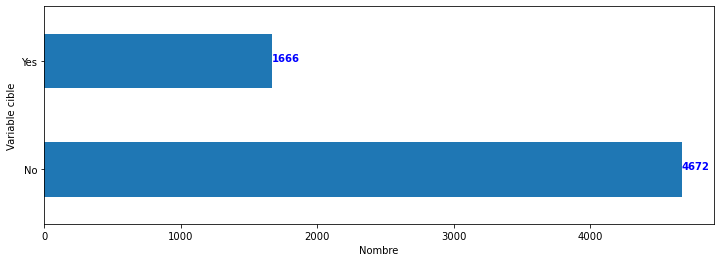

In [7]:
dataset['Churn'].value_counts().plot(kind='barh', figsize=(12,4))

y=dataset['Churn'].value_counts()

for i, value in enumerate(y):
    plt.text(value, i, str(value), color='blue', fontweight='bold')
    
plt.xlabel('Nombre' )
plt.ylabel('Variable cible')
plt.title('')
plt.show()

In [8]:
y=dataset['Churn'].value_counts()
100*y/len(dataset['Churn'])

No     73.714105
Yes    26.285895
Name: Churn, dtype: float64

Yes : 26% (1666) clients se sont désabonnés de l’entreprise, 
Non : 73% (4672) clients sont restés abonnés dans l’entreprise

### 2. Détectez et traitez les valeurs manquantes ou aberrantes (s’il y en a)

#### Verification valeurs manquantes

In [9]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6338 non-null   object 
 1   gender            6338 non-null   object 
 2   SeniorCitizen     6338 non-null   int64  
 3   Partner           6338 non-null   object 
 4   Dependents        6338 non-null   object 
 5   tenure            6338 non-null   int64  
 6   PhoneService      6338 non-null   object 
 7   MultipleLines     6338 non-null   object 
 8   InternetService   6338 non-null   object 
 9   OnlineSecurity    6338 non-null   object 
 10  OnlineBackup      6338 non-null   object 
 11  DeviceProtection  6338 non-null   object 
 12  TechSupport       6338 non-null   object 
 13  StreamingTV       6338 non-null   object 
 14  StreamingMovies   6338 non-null   object 
 15  Contract          6338 non-null   object 
 16  PaperlessBilling  6338 non-null   object 


TotalCharges devrait être de type int ou float comme MonthlyCharges étant donné que se sont des valeurs numériques. Cette colonne semble avoir des valeurs autres que numérique. Nous allons les convertir et les faire apparaitre sous le type NaN.

Procédant à une copie de notre dataset --> data1. Nous allons continuer notre étude avec la copie et conserver l'originale en cas de nécessité (S'il nous venais l'envie de comparer la version cleaning et celle non nettoyée.

In [10]:
data1=dataset.copy()

In [11]:
data1.shape

(6338, 21)

#### Visualisation de la des types de nos données

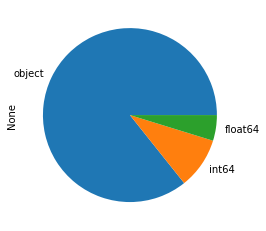

In [12]:

data1.dtypes.value_counts().plot.pie()
plt.show()

#### Conversion et somme de nos données non-numeriques de la colonne TotalCharges avec la fonction to_numric de pandas

In [13]:
data1.TotalCharges=pd.to_numeric(data1.TotalCharges, errors='coerce') #Coerce-->valeur non numérique incorrecte seront définies comme NaN
data1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Nous constatons qu'il y a bien 11 valeurs que nous pouvons considérer comme valeur manquantes.

#### Création d'un filtre pour n'afficher que les 11 valeurs manquantes dans notre dataset

In [14]:
data1.loc[data1['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
441,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
680,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
849,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
981,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1219,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2998,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3448,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3947,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
4698,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6010,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Supprimons les valeurs manquantes. 11/6338--> 0,17%, le pourcentage reste insignifiant et ne semblera pas impacté sur la perfomance de notre modèle. 

#### Suppression de 11 valeurs manquantes

In [15]:
data1.dropna(how='any', inplace=True)

In [16]:
data1.shape 

(6327, 21)

#### Verifions le types de notre colonne TotalCharges

In [17]:
data1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Nous avons bien float comme types à TotalCharges, ce qui nous indique que les valeurs restantes sont tous de type numerique.

### 3. Enrichissez la base de données en créant des variables pertinentes au regard du churn

#### Créer une nouvelle  varialbe "tenure_groupe" en regroupant nos colonnes tenure par années= 12 months. Afin de voir sur chaque année le nombre de mois durant lesquels les clients sont restés abonné avec l'entreprise

In [18]:
labels=["{0}-{1}".format(i, i+11) for i in range(1,72,12)]# de 1 -->72 avec un pas de 12 nous donne 6 lignes(6ans)

data1['tenure_groupe']=pd.cut(data1.tenure, range(1,80,12), right=False, labels=labels)

#### Total d'abonnés et de désabonnés réparti sur chaque année

In [19]:
data1['tenure_groupe'].value_counts(sort=False)

1-12     1950
13-24     908
25-36     760
37-48     694
49-60     752
61-72    1263
Name: tenure_groupe, dtype: int64

#### Suppression de la colonne tenure

In [20]:
data1.drop(columns=['customerID','tenure'], axis=1, inplace=True)

In [21]:
data1.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_groupe
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12


Nous avons maintenant dans notre tableau la nouvelle colonne tenure_groupe contenant nos variable tenure regroupée en année

# 2.Exploration des données

### 1. Graphiques (ou tableaux) pour regarder la corrélation/liaison entre le taux de churn (attrition) et les variables explicatives (démographiques et celles liées aux abonnements téléphoniques et internet

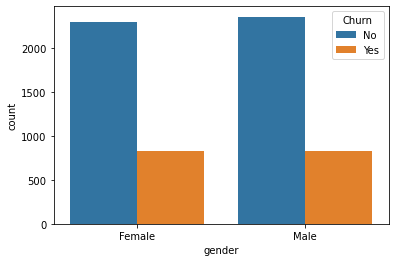

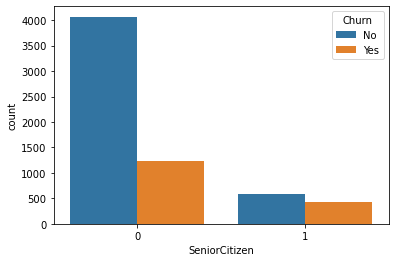

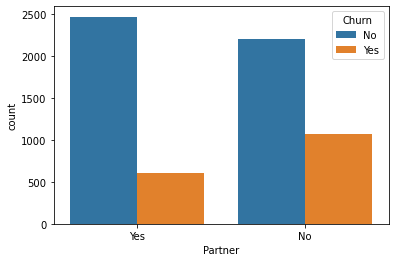

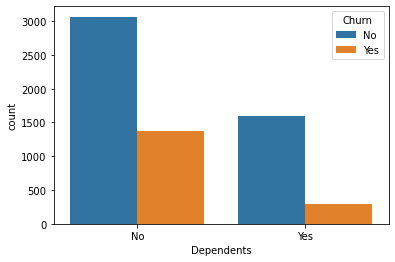

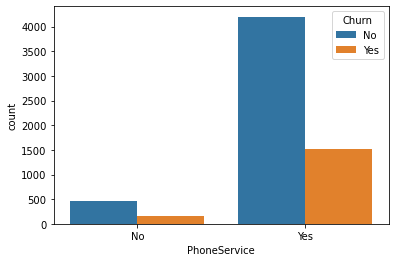

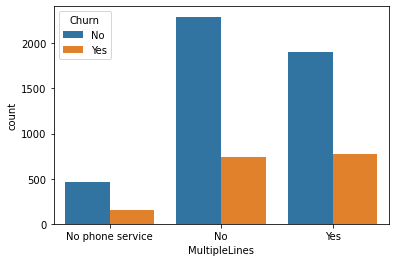

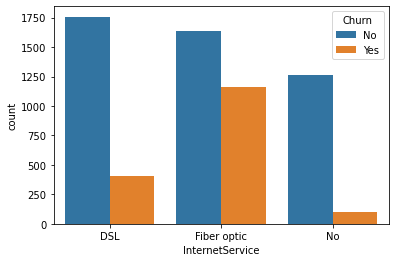

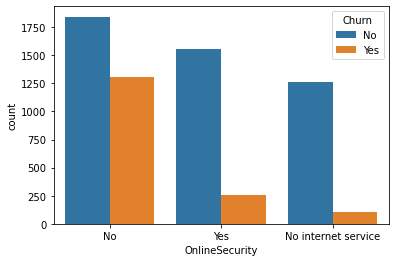

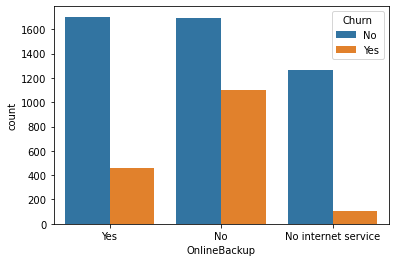

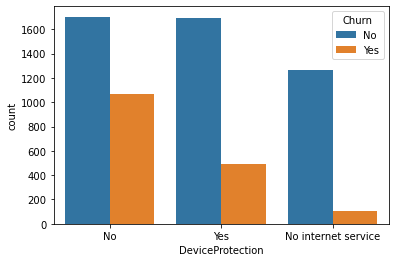

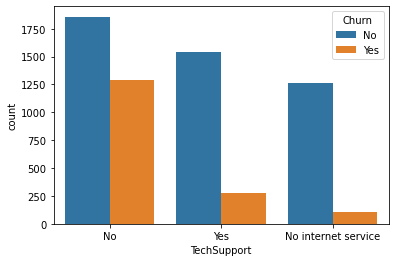

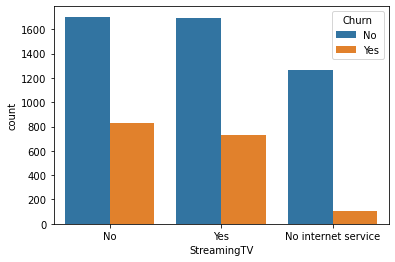

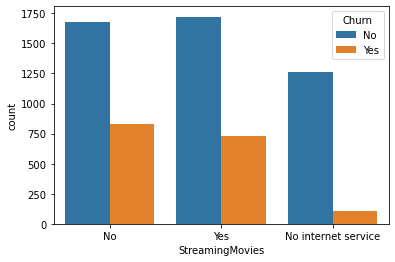

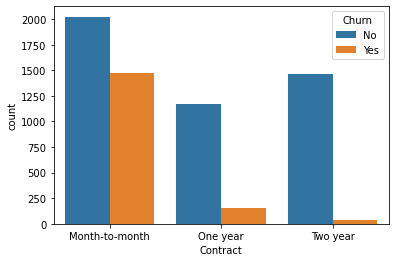

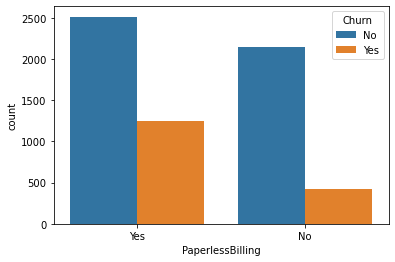

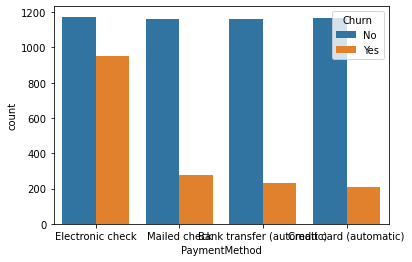

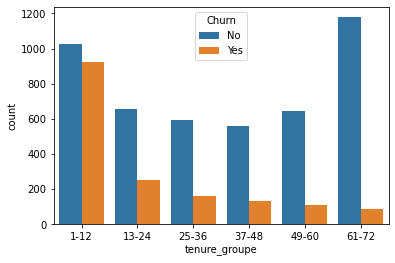

In [22]:
for i, prediction in enumerate(data1.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=data1, x=prediction, hue='Churn')
    
  
    

### 2. Interprétation des résultats des analyses descriptives

<p>1.  Distribution gender: Il y'a autant des femmes que des hommes donc le genre n'est pas un critère important dans l'abonnement ou le désabonnement des clients.</p>

<p>2. Distribution SeniorCitizen Ici le critère d'ages est très explicite. Chez les non-seniors(0) il y'a plus de fidélité que de désabonnement. Chez les senior(1) la différence est insignifiante entre les yes/no. On peut s'aventurer à dire qu'à plus de 65 ans il n'y a plus beaucoup d'abonnés dans l'ensemble bien qu'il y autant d'abonnée que de désabonnement.</p>

<p>3. Partner: Idem que sur la distribution gender (On pourrait dire que les couples ou célibataire n'est pas un critère important) à quelque exception près car les clients qui n'ont pas de conjoint se désabonne un peu plus que ceux en couple.</p>

<p>4. Dependents: Les clients qui non personne à leur charge il y a beaucoup qui reste abonnés et quasi 1/2 de la proportion des abonnés se désabonnes. Dans un même temps  ceu qui ont une personne à charge ils sont resté abonné pour la moitier et très peu se désabonne.</p>

<p>5. PhoneService: Quasiment tous ceux qui ont un abonnement téléphonique reste le plus abonnés et ont aussi un peu plus de désabonnement.</p>

<p>6. MultipleLines: Ceux qui souscrivent à plusieurs lignes ont autant de désabonnement que ceux qui ont une seul ligne. (MultipleLines ne semble pas un critère important).</p>

<p>7. OnlineSecurity: Ily a beaucoup de désabonnement chez les clients qui n'ont pas de sécurité en ligne.</p>

<p>8. OnlineBackup: Il y a beaucoup de désabonnement chez les clients qui n'ont pas de sauvegarde en ligne.</p>

<p>9. DeviceProtection: Il y a beaucoup de désabonnement pour les clients qui n'ont pas souscrit à un abonnement de protection supplémentaire.</p>

<p>10. TechSupport: Il y'a beaucoup de désabonnement chez ceux qui n'ont pas souscrit à un programme d'assistance technique.</p>

<p>11. StreamingMovies & Streaming TV: Il y a très peu de désabonnement chez les clients qui n'ont pas de service internet.</p>

<p>12. Contract: Il y a beaucoup de désabonnement pour les clients qui on un abonnement mensuel.</p>

<p>13. PaperlessBilling: Il y a moins de désabonnement chez ceu qui n'ont pas de facturation électronique.</p>

<p>14. PaymentMethod: Il y a beaucoup de désabonnement quasi équivalante que chez ceux qui sont restés abonnés pour ceux qui ont un moyen de paiement Electronic Check.</p>

<p>15. Sur la première année il y a plus d'abonnement que de désabonnement.</p>

#### Correlation entre les charges mensuelles et les charges totales

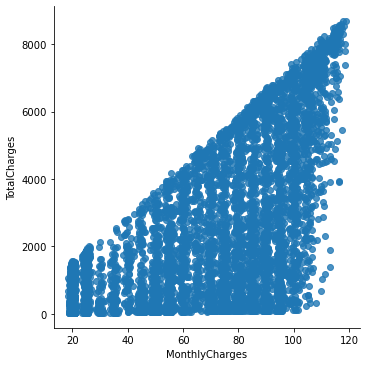

In [23]:
sns.lmplot(data=data1, x='MonthlyCharges', y='TotalCharges', fit_reg=False)
plt.show()

L'augmentation des charges mensuelles est porportionnelle au charges Totales

# 3. Modélisation

In [24]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

### 1. Construction de la base de modélisation (conversion de variables catégorielles en numérique, découpage de variables, transformation de variables, ....)

#### Conversion de la variable cible Churn Yes, No en variable binaire 1, 0

In [25]:
data1.Churn.replace(('Yes', 'No'), (1, 0), inplace=True)

In [26]:
data1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_groupe
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,1-12


Les valeurs entières ont une relation ordonnée naturelle entre elles et les algorithmes d'apprentissage automatique peuvent être capables d'apprendre cette relation 

#### Conversion de nos valeur catégorielle en valeur entière avec la fonction get_dummies de pandas

In [27]:
data1_dummies=pd.get_dummies(data1)

In [28]:
data1_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_groupe_1-12,tenure_groupe_13-24,tenure_groupe_25-36,tenure_groupe_37-48,tenure_groupe_49-60,tenure_groupe_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,99.65,820.50,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


#### Création de ma variable x et y

In [29]:
x=data1_dummies.drop('Churn', axis=1)
#print(x)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_groupe_1-12,tenure_groupe_13-24,tenure_groupe_25-36,tenure_groupe_37-48,tenure_groupe_49-60,tenure_groupe_61-72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,99.65,820.50,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
6334,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
6335,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
6336,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


#### Création de ma variable x et y

In [30]:
y=data1_dummies['Churn']
#print(y)
y

0       0
1       0
2       1
3       0
4       1
       ..
6333    0
6334    0
6335    0
6336    1
6337    0
Name: Churn, Length: 6327, dtype: int64

#### 2. Scindez la base de modélisation en échantillon d’apprentissage (70%) et de test (30%)

In [31]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3)

#### Vérifions le bon découpage de nos données  

In [32]:
print('train set:', x_train.shape)
print('test set:', x_test.shape )

train set: (4428, 50)
test set: (1899, 50)


#### 3. Implémentez les modèles de machine learning suivants et optimisez-les avec une des méthodes 
    d’optimisation vu en cours.
        a. Random forest
        b. XGBoost
        c. ANN (en optimisant le pas de descente de gradient)

### Random Forest Classifier

In [33]:
model_rfc = RandomForestClassifier(n_estimators=100,criterion='gini', random_state=100, max_depth=6, 
                                   min_samples_leaf=8)

model_rfc.fit(x_train, y_train)
y_pred_rfc=model_rfc.predict(x_test)

In [34]:
print(classification_report(y_test, y_pred_rfc, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1400
           1       0.71      0.43      0.53       499

    accuracy                           0.80      1899
   macro avg       0.76      0.68      0.70      1899
weighted avg       0.79      0.80      0.79      1899



## Analyse

Le tableau montre que le rappel et le f1-score de la classe 1 sont mauvais, tandis que pour la classe 0, ils sont élevés. En outre, la moyenne géométrique est également faible.

Le modèle entraîné n’est donc pas adapté à nos données.

### Notion des données déséquilibrées

On parle de données déséquilibrées lorsque les deux modalités de la variable cible Y ne sont pas représentées de façon égale dans l’échantillon, ou plus précisément lorsqu’une des deux modalités est fortement majoritaire.

Ce qui est notre cas pour Yes (1): 26% (1666) clients se sont désabonnés de l’entreprise, Non(0) : 73% (4672) clients sont restés abonnés dans l’entreprise.

Dans le cas de données comportant une classe fortement majoritaire, les algorithmes classiques sont souvent biaisés car leurs fonctions de perte tentent d’optimiser des métriques telles que le taux de bonnes prédictions, en ne tenant pas compte de la distribution des données.


Dans la majorité des cas, c’est justement la classe minoritaire qui présente le plus fort intérêt et que l’on aimerait pouvoir identifier, comme dans l’exemple de la détection de fraudes.

### Solution d'amélioration

Collecter davantage de données ou utiliser des méthodes de rééchantillonnage.

   #### Rééchantillonnage.

Vous pouvez modifier l’ensemble de données que vous utilisez avant d’entraîner votre modèle prédictif afin d’avoir des données plus équilibrées.

Cette stratégie est appelée rééchantillonnage et il existe deux méthodes principales que vous pouvez utiliser pour égaliser les classes : 

Le sur-échantillonnage : Oversampling et le sous-échantillonnage :Undersampling.

Les méthodes d’Oversampling fonctionnent en augmentant le nombre d’observations de la (des) classe(s) minoritaire(s) afin d’arriver à un ratio classe minoritaire/ classe majoritaire satisfaisant.

Inversement pour Undersampling. (Moi je vais utiliser SMOTEENN qui est aussi une méthode de Oversampling)

### Smoteenn

In [92]:
#Pour l'utilisation de smotenn il m'a fallu faire (Vous n'aurez certainement pas besoin, c'est juste au cas où):
    #une mise à jour de sciki-learn
    #mise à jour de python
    #!pip install imblearn

In [35]:
from imblearn.combine import SMOTEENN 

In [36]:
sm = SMOTEENN()
X_resample, y_resample = sm.fit_resample(x,y)

In [37]:

Xsm_train, Xsm_test, Ysm_train, Ysm_test = train_test_split(X_resample, y_resample,test_size=0.3)

In [38]:
model_smote=RandomForestClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [39]:
model_smote.fit(Xsm_train, Ysm_train)

yr_predict_sm = model_smote.predict(Xsm_test)

model_score_sm = model_smote.score(Xsm_test, Ysm_test)

print(model_score_sm)
print(metrics.classification_report(Ysm_test, yr_predict_sm))

0.9385474860335196
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       727
           1       0.93      0.97      0.95       884

    accuracy                           0.94      1611
   macro avg       0.94      0.94      0.94      1611
weighted avg       0.94      0.94      0.94      1611



Maintenant, nous pouvons voir de bien meilleurs résultats, c'est-à-dire Précision: 92%, et un très bon rappel, précision et score f1 pour la classe minoritaire.
Le F1-score permet de mesurer la précision et le rappel à la fois.

### Matrix de confusion (Autre méthode)

In [40]:
print(metrics.confusion_matrix(Ysm_test, yr_predict_sm))

[[658  69]
 [ 30 854]]


Pour résumer cette matrice en une métrique, il est possible d’utiliser le taux de bonnes prédictions ou accuracy . Ici il est égal à (629+865)/(629+79+34+865) = 0.9364

Nous obtenons d'assez bons résultats quasiment le même , en fait mieux que l'arbre de décision

#### 5. Comparez les modèles et choisissez-en le meilleur au regard de la
    performance sur la base test

Nous choississons le modele (model_smote) SMOTEENN qui est bien plus performant et adapté à notre étude (Données).

#### 4. Évaluez la performance des différents modèles sur le jeu de données test

In [41]:
import pickle

In [42]:
filename = 'MonModel.sav'

In [43]:
pickle.dump(model_smote, open(filename, 'wb'))

In [44]:
load_model = pickle.load(open(filename, 'rb'))

In [45]:
load_model.score(Xsm_test, Ysm_test)

0.9385474860335196

#### 6. Effectuez une prédiction de la probabilité de churn (d’attrition) d’un client sur
    le jeu de données Evaluation fourni avec votre meilleur modèle

In [46]:
df_eva=pd.read_csv('evaluation.csv')

In [68]:
df_eva.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_groupe
0,Female,0,No,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.15,382.2,13-24
1,Female,0,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),23.30,797.1,25-36


In [48]:
df_eva.shape

(705, 20)

In [50]:
df_eva.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,705.000000,705.000000,705.000000,705.000000
mean,0.177305,31.788652,64.656525,2244.151702
std,0.382198,25.058214,30.023803,2332.403877
min,0.000000,1.000000,18.800000,19.300000
25%,0.000000,8.000000,35.150000,345.500000
50%,0.000000,26.000000,70.350000,1269.600000
75%,0.000000,55.000000,88.400000,3739.800000
max,1.000000,72.000000,118.650000,8670.100000


In [51]:
df_eva.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        705 non-null    object 
 1   gender            705 non-null    object 
 2   SeniorCitizen     705 non-null    int64  
 3   Partner           705 non-null    object 
 4   Dependents        705 non-null    object 
 5   tenure            705 non-null    int64  
 6   PhoneService      705 non-null    object 
 7   MultipleLines     705 non-null    object 
 8   InternetService   705 non-null    object 
 9   OnlineSecurity    705 non-null    object 
 10  OnlineBackup      705 non-null    object 
 11  DeviceProtection  705 non-null    object 
 12  TechSupport       705 non-null    object 
 13  StreamingTV       705 non-null    object 
 14  StreamingMovies   705 non-null    object 
 15  Contract          705 non-null    object 
 16  PaperlessBilling  705 non-null    object 
 1

In [57]:
labels=["{0}-{1}".format(i, i+11) for i in range(1,72,12)]# de 1 -->72 avec un pas de 12 nous donne 6 lignes(6ans)

df_eva['tenure_groupe']=pd.cut(df_eva.tenure, range(1,80,12), right=False, labels=labels)

In [59]:
df_eva['tenure_groupe'].value_counts(sort=False)

1-12     225
13-24    116
25-36     72
37-48     68
49-60     80
61-72    144
Name: tenure_groupe, dtype: int64

In [60]:
df_eva.drop(columns=['customerID','tenure'], axis=1, inplace=True)

In [61]:
df_eva.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_groupe
0,Female,0,No,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.15,382.20,13-24
1,Female,0,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),23.30,797.10,25-36
2,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,309.25,13-24
3,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.35,3161.40,37-48
4,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,49-60


In [62]:
df_eva_dummies=pd.get_dummies(df_eva)

In [63]:
df_eva_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_groupe_1-12,tenure_groupe_13-24,tenure_groupe_25-36,tenure_groupe_37-48,tenure_groupe_49-60,tenure_groupe_61-72
0,0,30.15,382.20,1,0,1,0,0,1,1,...,0,0,1,0,0,1,0,0,0,0
1,0,23.30,797.10,1,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,19.35,309.25,1,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
3,0,75.35,3161.40,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,20.65,1020.75,1,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


# Prédiction

In [84]:
y_eva_predict = model_smote.predict(df_eva_dummies)

In [85]:
df_eva["Churn"]=y_eva_predict

In [91]:
df_eva.to_csv("evaluat.csv", index=None, header=True)
df_eva

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_groupe,Churn
0,Female,0,No,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.15,382.20,13-24,0
1,Female,0,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),23.30,797.10,25-36,0
2,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,309.25,13-24,0
3,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.35,3161.40,37-48,1
4,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,49-60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,Male,0,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,78.30,2564.30,25-36,1
701,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.75,1859.10,61-72,0
702,Male,0,Yes,Yes,Yes,No,DSL,Yes,No,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),76.40,3966.30,49-60,0
703,Female,1,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,85.00,85.00,1-12,1


#### Visualisons la repartition la  variable cible prédicte  

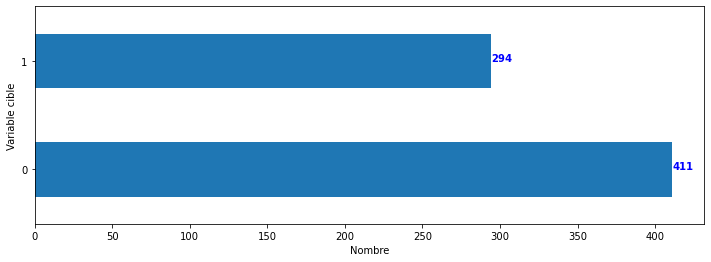

In [82]:
df_eva['Churn'].value_counts().plot(kind='barh', figsize=(12,4))

t=df_eva['Churn'].value_counts()

for i, value in enumerate(t):
    plt.text(value, i, str(value), color='blue', fontweight='bold')
    
plt.xlabel('Nombre' )
plt.ylabel('Variable cible')
plt.title('')
plt.show()

In [89]:
y=df_eva['Churn'].value_counts()
100*y/len(df_eva['Churn'])

0    58.297872
1    41.702128
Name: Churn, dtype: float64

In [ ]:
Yes : 41% (294) clients qui pourront se sont désabonnés de l’entreprise, 
Non : 58% (411) clients qui resteront abonnés dans l’entreprise

# Exploration des données (Prédiction)¶

#### 1. Graphiques (ou tableaux) pour regarder la corrélation/liaison entre le taux de churn (attrition) et les variables explicatives (démographiques et celles liées aux abonnements téléphoniques et internet

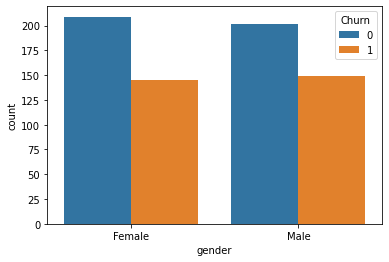

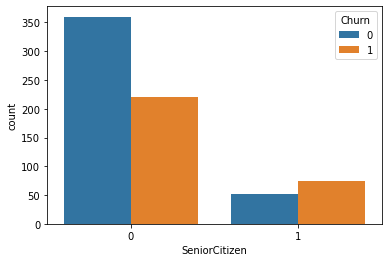

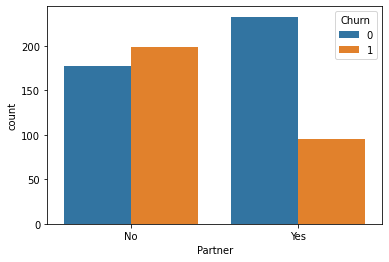

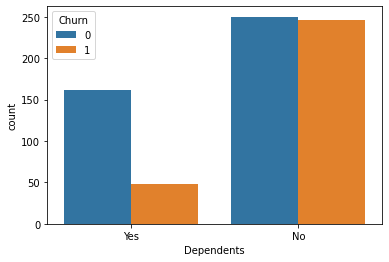

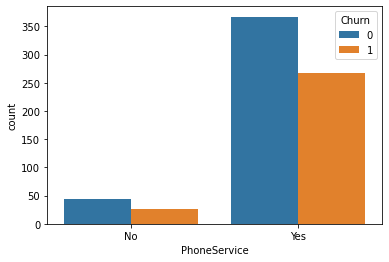

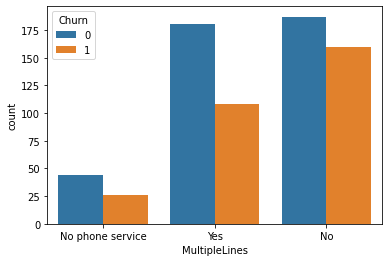

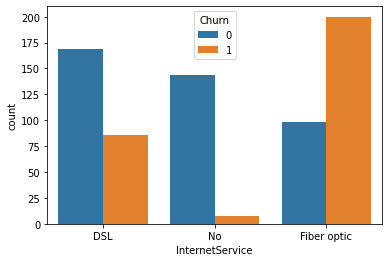

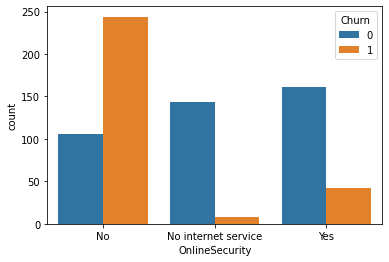

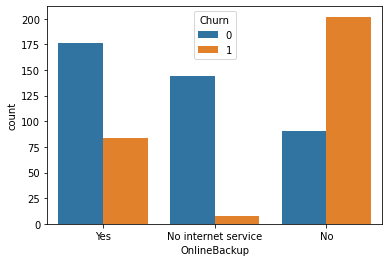

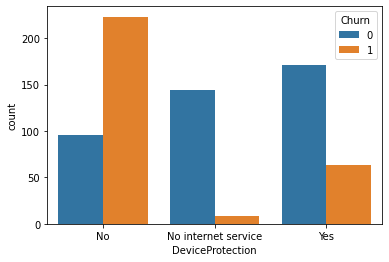

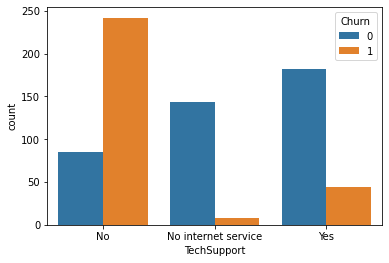

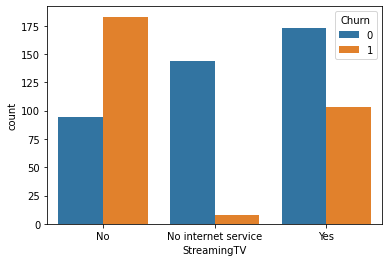

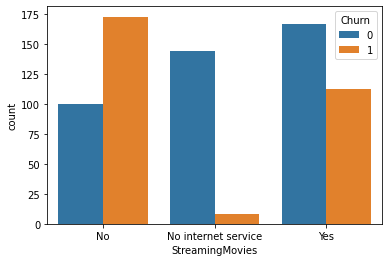

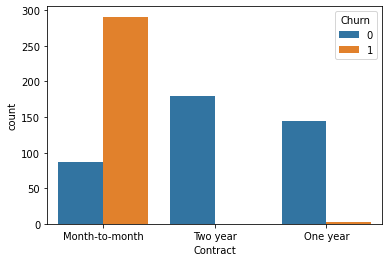

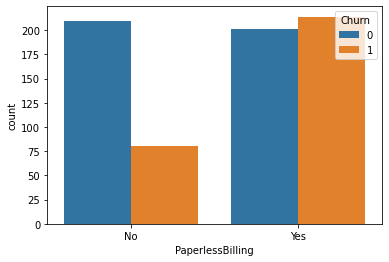

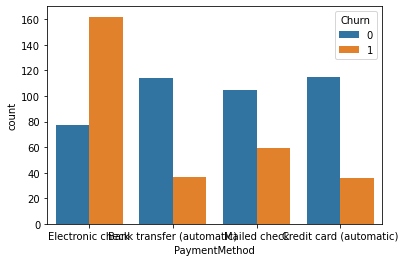

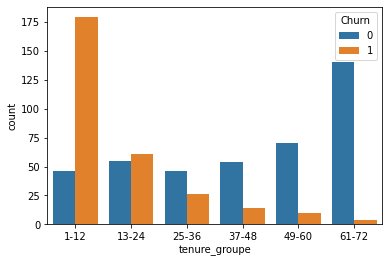

In [83]:
for i, prediction in enumerate(df_eva.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df_eva, x=prediction, hue='Churn')

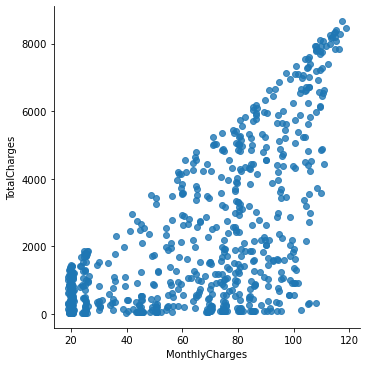

In [90]:
sns.lmplot(data=df_eva, x='MonthlyCharges', y='TotalCharges', fit_reg=False)
plt.show()

L'augmentation des charges mensuelles est porportionnelle au charges Totales (même rapport que celui de notre modele d'entrainement)

# Conclusion

Des actions doivent être menées pour éviter de tel chiffres, quasiment 50% des clients sur la base de notre échantillon pourront se désabonnés. 

1. Senior citizen --> menées plus d'action maximisé sur les moins de 65 ans
2. Partner --> sur les personne célibataire
3. Dependents --> Chez les clients qui non pas des aucune personne à leur charge
4. PhoneService --> Ceux qui ont un abonnement téléphone
5. MultipleLine and No
6. Fibre optic--> Les clients qui possède la fibre 
7. No internet service OnlineSecurity and No -->
etc...

Cette étude à été très enrichissantes pour moi, n'ayant pas suivi. complètement les cours, il m'a fallu faire mes propres recherche. J'admets être satisfait.
Si vous pouviez me faire un retour constructif afin de m'améliorer, je serai ravi de l'avoir.

In [54]:
#Pour l'utilisation de smotenn il m'a fallu faire:
    #une mise à jour de sciki-learn
    #mise à jour de python
    #!pip install imblearn

# Lien (Notion de déséquilibres des données)

In [55]:
#https://datascientest.com/comment-gerer-les-problemes-de-classification-desequilibree-partie-i

In [56]:
#https://lrouviere.github.io/TUTO_ML/dondes.html